### 1.1.1 Пример
> Пусть дана начальная популяция из четырех хромосом с двумя генами x и y. Показатель качества хромосомы оценивается функцией Z. При равном качестве хромосом предпочтение отдается хромосоме с большим номером. На каждом этапе хромосома a с высшим качеством порождает четыре новых хромосомы b_1,c_1,b_2,c_2, обмениваясь генами с двумя хромосомами b и c более низкого качества по указанной схеме:

> Последняя хромоcома (с низшим качеством) выбывает из популяции. Найти максимальный показатель качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.

> Потребуется несколько функций для реализации алгоритма. Напишем их.

In [24]:
# начнём с функции оценки качетсва хромосомы qZ(x,y):

# функция качества хромосомы
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

In [25]:
# далее, оценим суммарное качество хромосом:

# сумма качества
def qSumZ(Z):
    return sum(Z)


In [26]:
# и запрограммируем представленную выше схему обмена хромосомами:

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X, Y

In [27]:
# отсортируем массив качества наших потомков и выделим полученные индексы:

def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])

    return sortedId

In [28]:
# напишем функцию для шага эволюции:

# шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

In [29]:
# произведём эволюционные изменения, в соответствии с задачей - 4 шага:

# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

Теперь, когда мы подготовились к решению задачи, написав все необходимые функции для реализации генетического алгоритма (оценки качества хромосом, сортировки потомков и эволюционных шагов), решим задачу в числах.

Пусть даны следующие массивы хромосом X и Y:

Запишем их в требуемом виде и воспользуемся написанной функцией evoSteps.

Теперь, выведем полученные значения для показателя качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции. Для этого, воспользуемся циклом по значениям переменной results.

In [30]:
# объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

In [31]:
# реализация алгоритма
results = evoSteps(X, Y)

In [32]:
# Теперь, выведем полученные значения для показателя качества хромосомы
# в популяции и общее качество популяции после четырех этапов эволюции.
# для этого, воспользуемся циклом по значениям переменной results.

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z: 1.0


### Задание 1.1

In [33]:
# Вариант 6
def qZ(x, y):
    return (x + 3 * y) / (x ** 2 + y ** 2 + 1)

def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X, Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])

    return sortedId

def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

X = [-5, -3, -2, -1]
Y = [-1, -2, 0, 1]
results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: -0.6724867724867726
max_2_step: -1.7407407407407407
max_3_step: 0.35925925925925917
max_4_step: 1.4259259259259258
max Z: 0.6666666666666666


### 1.2.1 Пример
Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:
![img.png](C:\Users\volko\PycharmProjects\AI_RTU_MIREA\notebooks\img.png)


In [34]:
# рассмотрим решение с применением Python

# импортируем библиотеки:
import networkx as nx
from math import e

In [35]:
# Далее, опишем массив длин ребер, последовательности прохождение
# вершин на маршруте и их замены, значения P, а также начальную температуру:
distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 27),
            (4, 6, 22),
            (5, 6, 26)] # длины рёбер

V = [1, 4, 5, 2, 6, 3, 1] # последовательность происхождения маршрута
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)] # последовательность замен вершин
P = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счёта

T = 100 # начальная температура

In [36]:
# запишем функцию вероятности и изменения температуры:

# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

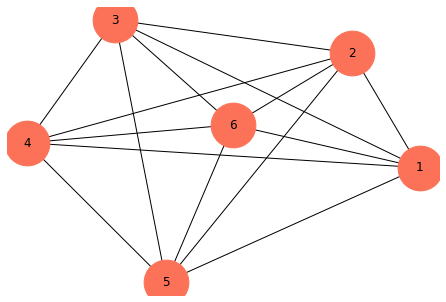

In [37]:
# построим граф по заданным вершинам, как в начальном условии:

graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size = 2000, with_labels=True)

In [38]:
# теперь, напишем необходимые, согласно алгориму выше, функции для
# работы метода имитации отжига. Вычислим длину ребра:

# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [39]:
# вычислим длину маршрута

# вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))

    return sum(edges)

In [40]:
# запишем функцию для однократной перестановки в пути:

# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

In [41]:
# а теперь запишем функцию, для реализации непосредственно самой перестановки:

# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [42]:
# теперь, опишем алгоритм выбора подходящего пути методом отжига:

# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности

            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

            T = reductTemp(T) # вычисление температуры

    return V, arrSum

In [43]:
# нарисуем наш граф, отвечающий заданному маршруту:

# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size = 2000, with_labels=True)

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 171]


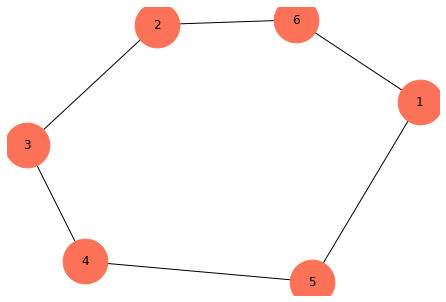

In [44]:
# и, наконец, рассчитаем наилучший маршрут м его длину:

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

## Задание 1.2.1

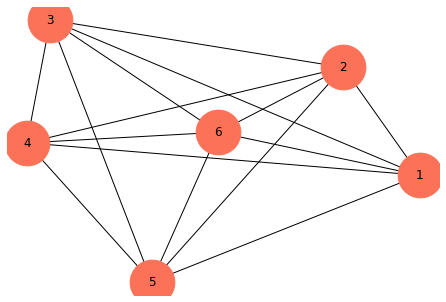

In [45]:
# Вариант 5
import networkx as nx
from math import e

distances = [(1, 2, 18),
            (1, 3, 41),
            (1, 4, 36),
            (1, 5, 29),
            (1, 6, 19),
            (2, 3, 27),
            (2, 4, 31),
            (2, 5, 37),
            (2, 6, 15),
            (3, 4, 19),
            (3, 5, 42),
            (3, 6, 23),
            (4, 5, 24),
            (4, 6, 17),
            (5, 6, 24)]
V = [1, 3, 4, 5, 6, 2, 1]
Z = [(2, 4),
    (3, 4),
    (4, 6),
    (5, 6)]
P = [63, 49, 45, 53]
T = 100

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size = 2000, with_labels=True)

Лучший выбранный маршрут: [1, 5, 3, 2, 4, 6, 1]
Длина лучшего выбранного маршрута: 165
Длины всех рассмотренных маршрутов: [141, 128, 140, 166, 165]


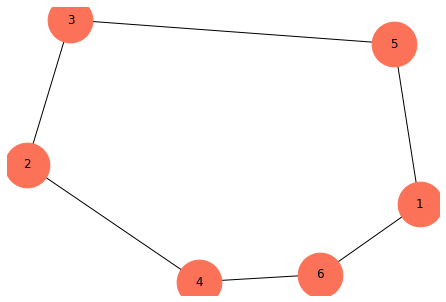

In [46]:
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))

    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности

            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

            T = reductTemp(T) # вычисление температуры

    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size = 2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)